# EDA Project: Senior Pet Intakes and Outcomes at Austin Animal Center

In this project, I used data from the Austin Animal Center to look at the intakes and outcomes of senior cats and dogs. I also tested the hypothesis that it took longer for senior pets to be adopted than younger pets. I was inspired to look at senior pets in particular since I started following Albert's Dog Lounge, whose mission is to rescuing and providing loving homes to senior, special needs, and hospice dogs.

To understand the patterns in senior pets intakes and outcomes, I used the animal outcomes and animal intakes datasets from the Austin Animal Center. I chose to use these datasets because of two main reasons: 
1. The datasets go back to October 2013, providing with me with almost 9 years of data to work with.
2. The datasets are publicly available and easy to access, which is quite rare for shelter data to the best of my knowledge.
3. Having both intake and outcome data allows me to track an animal's length of stay in the shelter before adoption.

## Loading, exploring, and cleaning the data

In [1]:
# Load packages
import pandas as pd
import numpy as np

In [2]:
# Read in the csv files
raw_outcomes = pd.read_csv("raw_outcomes.csv")
raw_outcomes.columns = raw_outcomes.columns.str.lower()
raw_outcomes.head()

,animal id,name,datetime,monthyear,date of birth,outcome type,outcome subtype,animal type,sex upon outcome,age upon outcome,breed,color
0,A794011,Chunk,05/08/2019 06:20:00 PM,May 2019,05/02/2017,Rto-Adopt,NaN,Cat,Neutered Male,2 years,Domestic Shorthair Mix,Brown Tabby/White
1,A776359,Gizmo,07/18/2018 04:02:00 PM,Jul 2018,07/12/2017,Adoption,NaN,Dog,Neutered Male,1 year,Chihuahua Shorthair Mix,White/Brown
2,A821648,NaN,08/16/2020 11:38:00 AM,Aug 2020,08/16/2019,Euthanasia,NaN,Other,Unknown,1 year,Raccoon,Gray
3,A720371,Moose,02/13/2016 05:59:00 PM,Feb 2016,10/08/2015,Adoption,NaN,Dog,Neutered Male,4 months,Anatol Shepherd/Labrador Retriever,Buff
4,A674754,NaN,03/18/2014 11:47:00 AM,Mar 2014,03/12/2014,Transfer,Partner,Cat,Intact Male,6 days,Domestic Shorthair Mix,Orange Tabby


In [3]:
raw_intakes = pd.read_csv("raw_intakes.csv")
raw_intakes.columns = raw_intakes.columns.str.lower()
raw_intakes.head()

,animal id,name,datetime,monthyear,found location,intake type,intake condition,animal type,sex upon intake,age upon intake,breed,color
0,A786884,*Brock,01/03/2019 04:19:00 PM,January 2019,2501 Magin Meadow Dr in Austin (TX),Stray,Normal,Dog,Neutered Male,2 years,Beagle Mix,Tricolor
1,A706918,Belle,07/05/2015 12:59:00 PM,July 2015,9409 Bluegrass Dr in Austin (TX),Stray,Normal,Dog,Spayed Female,8 years,English Springer Spaniel,White/Liver
2,A724273,Runster,04/14/2016 06:43:00 PM,April 2016,2818 Palomino Trail in Austin (TX),Stray,Normal,Dog,Intact Male,11 months,Basenji Mix,Sable/White
3,A665644,NaN,10/21/2013 07:59:00 AM,October 2013,Austin (TX),Stray,Sick,Cat,Intact Female,4 weeks,Domestic Shorthair Mix,Calico
4,A682524,Rio,06/29/2014 10:38:00 AM,June 2014,800 Grove Blvd in Austin (TX),Stray,Normal,Dog,Neutered Male,4 years,Doberman Pinsch/Australian Cattle Dog,Tan/Gray


In each data set, each row represents the status of an animal as it enters (intake data) or exits (outcome data) the shelter. You can see the first few rows of the data as above.

In [4]:
raw_intakes["animal type"].value_counts()

Dog          77298
Cat          51836
Other         7271
Bird           653
Livestock       24
Name: animal type, dtype: int64

In [5]:
raw_outcomes["animal type"].value_counts()

Dog          77271
Cat          52161
Other         7273
Bird           653
Livestock       25
Name: animal type, dtype: int64

From this point on, I will focus the analysis on dogs and cats for two reasons. First, these two animal types make up the majority of the data as can be seen above. Second, my goal is to classify animals into young, adult and senior age groups. It is more convenient to focus on dogs and cats in this case because definitions for senior for these two animal types are easier to find.

In [6]:
# Focus on dogs and cats only for easier age group classifications 
sample_outcomes = raw_outcomes[(raw_outcomes["animal type"] == "Dog") | (raw_outcomes["animal type"] == "Cat")].copy()
sample_intakes = raw_intakes[(raw_intakes["animal type"] == "Dog") | (raw_intakes["animal type"] == "Cat")].copy()

print(sample_outcomes.shape)
print(sample_intakes.shape)

(129432, 12)
(129134, 12)


**Age group classification**

First, let's look at the ``age upon outcome`` and ``age upon intake`` columns to see how the age of the animals is reported.

In [9]:
# Unique values of age_upon_outcome field
sample_outcomes["age upon outcome"].value_counts(dropna=False)

1 year       20292
2 years      19407
2 months     17033
3 years       7783
3 months      6599
1 month       5858
4 years       4685
4 months      4431
5 years       4372
5 months      3189
6 years       2909
6 months      2892
8 years       2546
7 years       2521
3 weeks       2298
2 weeks       2223
8 months      2114
10 years      2041
10 months     1973
7 months      1720
4 weeks       1580
9 years       1407
9 months      1377
12 years       993
1 weeks        959
11 months      865
11 years       802
1 week         717
13 years       655
14 years       441
3 days         394
15 years       369
2 days         359
1 day          293
6 days         250
4 days         231
0 years        178
16 years       163
5 days         152
5 weeks        149
17 years        92
18 years        53
19 years        27
20 years        19
-1 years         6
22 years         6
NaN              5
23 years         1
-3 years         1
-2 years         1
24 years         1
Name: age upon outcome, dtype: 

In [10]:
sample_intakes["age upon intake"].value_counts()

1 year       19960
2 years      19436
1 month      13386
3 years       7650
2 months      7581
4 years       4713
4 weeks       4570
5 years       4312
3 weeks       3954
3 months      3600
4 months      3514
5 months      3032
6 years       2900
2 weeks       2757
7 years       2511
8 years       2440
6 months      2374
9 months      2000
7 months      1985
10 years      1959
8 months      1595
9 years       1428
10 months     1111
1 week        1099
1 weeks       1001
12 years       951
11 months      858
0 years        812
11 years       798
1 day          688
3 days         647
13 years       624
2 days         536
14 years       434
15 years       365
6 days         350
5 weeks        338
4 days         324
5 days         182
16 years       158
17 years        88
18 years        51
19 years        27
20 years        19
-1 years         6
22 years         6
23 years         1
-3 years         1
-2 years         1
24 years         1
Name: age upon intake, dtype: int64

First, there are 5 missing values in ``age upon outcome``. Let's take a quick look at the entries with these missing values.

In [12]:
sample_outcomes[sample_outcomes["age upon outcome"].isna()]

,animal id,name,datetime,monthyear,date of birth,outcome type,outcome subtype,animal type,sex upon outcome,age upon outcome,breed,color
135818,A850137,A850137,01/19/2022 05:37:00 PM,Jan 2022,01/19/2018,Euthanasia,Suffering,Cat,Spayed Female,NaN,Domestic Medium Hair,Blue
136916,A849335,*Pancho,01/17/2022 02:23:00 PM,Jan 2022,08/06/2021,NaN,NaN,Dog,NaN,NaN,Border Collie,Black/White
137086,A852234,NaN,03/01/2022 01:54:00 PM,Mar 2022,02/28/2020,Euthanasia,Suffering,Cat,Intact Female,NaN,Domestic Shorthair,Calico
137194,A852514,NaN,03/04/2022 12:19:00 PM,Mar 2022,03/04/2020,Euthanasia,Suffering,Cat,Unknown,NaN,Domestic Shorthair,Brown Tabby
137352,A852420,A852420,03/09/2022 03:29:00 PM,Mar 2022,01/21/2022,Transfer,Partner,Dog,Intact Male,NaN,Miniature Schnauzer,Black/Gray


As you can see, these 5 entries with missing values for ``age upon outcome`` document outcomes that happened pretty recently, i.e: between Jan and March. Even though the ``age upon outcome`` are missing, we can deduce these values by subtracting ``date of birth`` from ``datetime`` (i.e: the date of the outcome). First, let's convert these two fields to datetime objects, and then calculate the age of the animals at the date of the outcome in years.

In [24]:
# Convert to datetime values ``date of birth`` and ``datetime`` in the sample_outcomes data 
sample_outcomes["datetime"] = pd.to_datetime(sample_outcomes["datetime"])
sample_outcomes["date of birth"] = pd.to_datetime(sample_outcomes["date of birth"])

# Calculate the age in years for the missing ``age upon outcome`` rows.
    # Divided by 365 to convert the age in days to age in years.
    # astyp("str") to facilitate the clean_cols help function below
sample_outcomes.loc[sample_outcomes["age upon outcome"].isna(), "age upon outcome"] = ((sample_outcomes["datetime"]
                                                                                      - sample_outcomes["date of birth"])
                                                                                       .dt.days / 365).astype("str")

The ``age upon intake`` and ``age upon outcome`` are currently in the unit of years, months, weeks or days. To ease classifying ages into different groups, I will convert all the ages in months, weeks and days to ages in years since the most common definitions of senior ages in dogs and cats are based on this unit. For example, age of 5 weeks will be converted to 0 years, and that animal will be considered as young. In the next block of code, I clean up the age fields to make sure they are of the same unit and format. This will facilitate my categorization of animals into age groups later.

In [25]:
# Helper functions to clean age values
def clean_cols(data, col):
    ''' Clean out the age columns in animals' intake and outcome data
        Args:
        ------------------
        dataframe and column          
    '''
    # Delete "-" in front of some age values.
    data[col] = data[col].str.replace("-", "") 
    
    # Extract age number and put it in a separate column.
    data["age_number"] = data[col].str.split().str[0].astype(float) # str[0] is to keep only the age number, not age unit.
    
    # Convert age in months, weeks and days to 0 age in years.
        # Other entries without "month|week|day" - the age number stays the same as recorded.
    data.loc[data[col].str.contains("month|week|day", regex=True), "age_number"] = 0

In [26]:
# Clean age values for sample_outcomes and sample_intakes
clean_cols(sample_outcomes, "age upon outcome")
clean_cols(sample_intakes, "age upon intake")

Now with the ``age_number`` column contains the animal's ages in years, I can classify them into different age groups. The most common definitions for senior cats and dogs are:
1. Cats older than 10 years old are normally considered senior.
2. Dogs older than 7 years old are normally considered senior.<br>

Other animals younger than those ages are considered to be in young-adult age group.

In [30]:
# Helper function to classify into age groups
def classify_age(data, col):
    ''' Classify animals into age groups based on species
        Args:
        ---------------------------------
        dataframe and column name (string)
    '''
    # Age group classification for cats
    data.loc[data["animal type"] == "Cat", "age_group"] = pd.cut(data[col],
                                                                bins = [0, 11, 99],
                                                                right = False,
                                                                labels = ["young-adult", "senior"],
                                                                include_lowest = True)
    
    # Age group classification for dogs
    data.loc[data["animal type"] == "Dog", "age_group"] = pd.cut(data[col],
                                                                bins = [0, 8, 99],
                                                                right = False, 
                                                                labels = ["young-adult", "senior"],
                                                                include_lowest = True)   

In [31]:
# Classify into different age categories for intake data
classify_age(sample_intakes, "age_number")

# For outcome data
classify_age(sample_outcomes, "age_number")

In [33]:
# Create a table to show senior animals as a percentage of all intakes
intake_by_age = sample_intakes["age_group"].value_counts(dropna=False).to_frame()
intake_by_age.columns = ["counts"]
intake_by_age["percentage"] = intake_by_age["counts"] / len(sample_intakes.index) * 100
intake_by_age.head()

,counts,percentage
young-adult,121299,93.932659
senior,7835,6.067341


Text(0.5, 0.98, 'Senior animals make up only 10% of all intakes since October 2013')

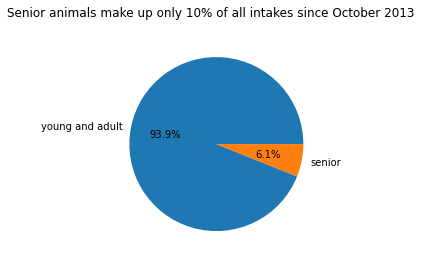

In [34]:
# Pie chart representation 
import matplotlib.pyplot as plt
%matplotlib inline

intake_by_age.plot(kind="pie", y="percentage", ylabel="",
                  labels=["young and adult", "senior"],
                   autopct = "%1.1f%%", legend=False)

plt.suptitle("Senior animals make up only 10% of all intakes since October 2013")

Now, let's look a little closer at the outcomes of senior animals at the time they exit the shelter.

In [38]:
# Focus on outcomes of senior animals only
senior_outcomes = sample_outcomes[sample_outcomes["age_group"] == "senior"].copy()

In [39]:
# Look at the outcomes of these senior animals by percentage
senior_outcomes_freq = senior_outcomes["outcome type"].value_counts(dropna=False).to_frame()
senior_outcomes_freq.columns = ["counts"]
senior_outcomes_freq["percentage"] = senior_outcomes_freq["counts"] / len(senior_outcomes.index) * 100
senior_outcomes_sorted = senior_outcomes_freq.sort_values("percentage")

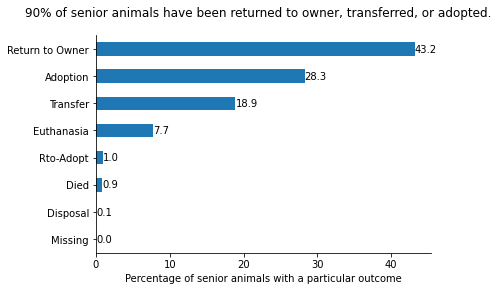

In [40]:
# Pie chart for the outcomes of senior animals. 
ax = senior_outcomes_sorted.plot.barh(y="percentage", legend=False)

plt.suptitle("90% of senior animals have been returned to owner, transferred, or adopted.")
plt.xlabel("Percentage of senior animals with a particular outcome")
ax.bar_label(ax.containers[0], fmt="%.1f")
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

My conclusions so far are:
1. Senior animals make up only a small percentage of all animals intakes at the Austin Animal Shelter since October 2013.
2. The majority of them have exited the shelter with a good outcome. That is, as of the time of this report in March 2022, they have been either been returned to owner (43%), adopted (28%), or transferred to a partner organization (19%). About 7.7% of all senior animals have been euthanized since October 2013.

## Do seniors animals stay in the shelter longer in comparison to younger animals?

To answer this question requires computing the amount of time an animal stayed in the shelter until it got adopted. Here is the breakdown of the steps I will be taking to do this.
1. Convert the intake date field ``datetime`` to datetime object in pandas. The outcome date field has already been converted in a step above.
2. Merge the intake data and adoption outcome data to allow connecting an animal from intake to adoption outcome, and make sure the merges are valid (i.e: the intake date should be before the outcome date).
3. Compute the amount of time an animal stayed in the shelter as defined by the number of days between intake and adoption.
4. Using scipy package to test for statistically significant differences in the length of stay in shelter of senior animals as compared to that of younger animals.

In [41]:
# Convert the intake date field to datetime objects
sample_intakes["datetime"] = pd.to_datetime(sample_intakes["datetime"])
sample_intakes["year"] = sample_intakes["datetime"].dt.year
sample_intakes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129134 entries, 0 to 137081
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   animal id         129134 non-null  object        
 1   name              94836 non-null   object        
 2   datetime          129134 non-null  datetime64[ns]
 3   monthyear         129134 non-null  object        
 4   found location    129134 non-null  object        
 5   intake type       129134 non-null  object        
 6   intake condition  129134 non-null  object        
 7   animal type       129134 non-null  object        
 8   sex upon intake   129133 non-null  object        
 9   age upon intake   129134 non-null  object        
 10  breed             129134 non-null  object        
 11  color             129134 non-null  object        
 12  age_number        129134 non-null  float64       
 13  age_group         129134 non-null  object        
 14  year

In [81]:
# Merge the intake data and adoption outcome data to allow connecting an animal from intake to adoption outcome.
merged_df = pd.merge(sample_intakes, sample_outcomes,
                    how = "left",
                    on = "animal id",
                    suffixes = ["_intake", "_outcome"],
                    indicator = True)

In [82]:
merged_df.columns

Index(['animal id', 'name_intake', 'datetime_intake', 'monthyear_intake',
       'found location', 'intake type', 'intake condition',
       'animal type_intake', 'sex upon intake', 'age upon intake',
       'breed_intake', 'color_intake', 'age_number_intake', 'age_group_intake',
       'year', 'name_outcome', 'datetime_outcome', 'monthyear_outcome',
       'date of birth', 'outcome type', 'outcome subtype',
       'animal type_outcome', 'sex upon outcome', 'age upon outcome',
       'breed_outcome', 'color_outcome', 'age_number_outcome',
       'age_group_outcome', '_merge'],
      dtype='object')

In [83]:
# Clean up columns of the merged dataframe. 
merged_df.drop(columns=["name_outcome", "animal type_outcome", 
                        "sex upon outcome", "breed_outcome", "color_outcome"],
              axis=1, inplace=True)

merged_df.rename(columns={"name_intake":"name", "animal type_intake":"animal type",
                         "sex upon intake":"sex", "breed_intake":"breed", "color_intake":"color"},
                inplace=True)

In [45]:
merged_df["_merge"].value_counts(dropna=False)

both          169026
left_only        496
right_only         0
Name: _merge, dtype: int64

As you can see, most of the animals in the intake data can be found in the outcome data, i.e: entries where the ``_merge`` field has a ``both`` value. I will call this sample the ``left_shelter`` sample. In addition, there are 496 animals in the intake data without a match in the outcome data, i.e: entries where the ``_merge`` field has a ``left_only`` value. I will call this sample ``stay_sample``. Below, I will look at each of the samples one by one.

**Animals that have left the shelter**

In [46]:
# Keep the sample of animals that have left the shelter
left_shelter = merged_df[merged_df["_merge"] == "both"].copy()
left_shelter.head()

,animal id,name,datetime_intake,monthyear_intake,found location,intake type,intake condition,animal_type,sex,age upon intake,...,year,datetime_outcome,monthyear_outcome,date of birth,outcome type,outcome subtype,age upon outcome,age_number_outcome,age_group_outcome,_merge
0,A786884,*Brock,2019-01-03 16:19:00,January 2019,2501 Magin Meadow Dr in Austin (TX),Stray,Normal,Dog,Neutered Male,2 years,...,2019,2019-01-08 15:11:00,Jan 2019,2017-01-03,Transfer,Partner,2.0136986301369864,2.013699,young-adult,both
1,A706918,Belle,2015-07-05 12:59:00,July 2015,9409 Bluegrass Dr in Austin (TX),Stray,Normal,Dog,Spayed Female,8 years,...,2015,2015-07-05 15:13:00,Jul 2015,2007-07-05,Return to Owner,NaN,8.005479452054795,8.005479,senior,both
2,A724273,Runster,2016-04-14 18:43:00,April 2016,2818 Palomino Trail in Austin (TX),Stray,Normal,Dog,Intact Male,11 months,...,2016,2016-04-21 17:17:00,Apr 2016,2015-04-17,Return to Owner,NaN,1.0136986301369864,1.013699,young-adult,both
3,A665644,NaN,2013-10-21 07:59:00,October 2013,Austin (TX),Stray,Sick,Cat,Intact Female,4 weeks,...,2013,2013-10-21 11:39:00,Oct 2013,2013-09-21,Transfer,Partner,0.0821917808219178,0.082192,young-adult,both
4,A682524,Rio,2014-06-29 10:38:00,June 2014,800 Grove Blvd in Austin (TX),Stray,Normal,Dog,Neutered Male,4 years,...,2014,2014-07-02 14:16:00,Jul 2014,2010-06-29,Return to Owner,NaN,4.010958904109589,4.010959,young-adult,both


In [47]:
# Drop observations that have datetime_outcome < datetimetime_intake since intake date needs to be before outcome date.
left_shelter["flag"] = (left_shelter["datetime_intake"] > left_shelter["datetime_outcome"])
left_shelter["flag"].value_counts(dropna=False)

False    148146
True      20880
Name: flag, dtype: int64

In [48]:
# Keep the valid merges only, i.e: where there is no flag for entries with the date of outcome later than the date of entry.
left_shelter = left_shelter[left_shelter["flag"] == False].copy()

Since the primary hypothesis I would like to test is whether senior animals stay a longer time in shelter before being adopted compared to younger animals, I will further subset the sample of animals having exited the shelter to ``Adoption`` outcome type.

In [51]:
adoption_sample = left_shelter[left_shelter["outcome type"] == "Adoption"].copy()

In [56]:
# Compute the number of days an animal stayed in shelter from the day of intake to the day of adoption
adoption_sample["time_stay"] = (adoption_sample["datetime_outcome"] - adoption_sample["datetime_intake"]).dt.days

Next, I subset the data into senior animals and younger animals adoptions for hypothesis testing later.

In [59]:
# Subset into senior and younger animals' length of stay for hypothesis testing
senior_length = adoption_sample.where(adoption_sample["age_group_outcome"] == "senior").dropna()["time_stay"] # returns a series of "time_stay"
young_length = adoption_sample.where(adoption_sample["age_group_outcome"] == "young-adult").dropna()["time_stay"]

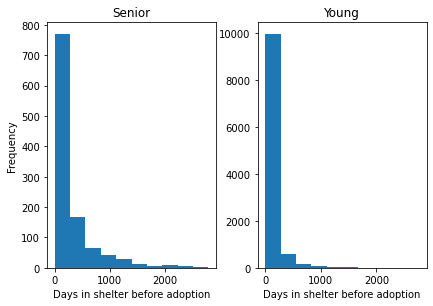

In [63]:
# Visualize the distribution for these two samples
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.tight_layout(h_pad=4) # prevents overlapping
ax1.hist(senior_length)
ax2.hist(young_length)

ax1.set_title("Senior")
ax2.set_title("Young")
ax1.set(ylabel="Frequency")
for ax in [ax1, ax2]:
    ax.set(xlabel='Days in shelter before adoption')

In [65]:
print("Senior animals' length of stay before adoption summary statistics")
print(senior_length.describe())
print("\n")
print("Younger animals' length of stay before adoption summary statistics")
print(young_length.describe())

Senior animals' length of stay before adoption summary statistics
count    1104.000000
mean      292.434783
std       404.442824
min         2.000000
25%        51.750000
50%       134.000000
75%       371.000000
max      2794.000000
Name: time_stay, dtype: float64


Younger animals' length of stay before adoption summary statistics
count    10846.000000
mean       113.374055
std        193.615910
min          0.000000
25%         36.000000
50%         58.000000
75%        104.000000
max       2767.000000
Name: time_stay, dtype: float64


In [66]:
# How many zeros in younger group?
young_length.value_counts()[0]

13

The length of stays distributions for both senior and younger pets are heavily skewed to the left. Let's first try transforming the variables to log forms to see if it allows using parametric t-test. One thing about a log transformation is it does not work with zero values. For younger animals, there are zero values in the length of stay. However, the number of zero values is small - only 13 values. To deal with these zero values, I choose a common method - adding a small constant to each value and then take the log transformation for the younger animal adoptions group.

In [68]:
log_senior = np.log(senior_length)
log_young = np.log(young_length + 0.0001)

{'whiskers': [<matplotlib.lines.Line2D at 0x1f3d6c889a0>,
 'caps': [<matplotlib.lines.Line2D at 0x1f3d6c88fa0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1f3d6c886d0>,
 'medians': [<matplotlib.lines.Line2D at 0x1f3d6c974f0>,
 'fliers': [<matplotlib.lines.Line2D at 0x1f3d6c977c0>,
 'means': []}

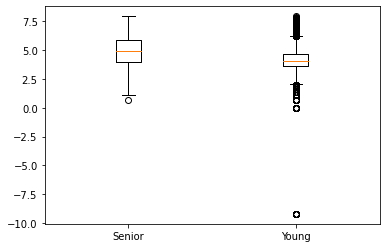

In [69]:
plt.boxplot([log_senior, log_young],
           labels = ["Senior", "Young"])

Even after the log transformations, there are still quite a few outliers in the log distributions of both senior and young groups. In my opinion, these outliers actually contain valuable information about the amount of time an animal stays in the shelter before adoption. As a result, I decide to keep these outliers intact and use the Mann-Whitney U test, a non-parametric equivalent to independent samples t-test.

Unlike the t-test, the Mann-Whitney U test only requires the two groups of interest for our hypothesis testing are indepedent. This assumption is reasonable in my case because the senior animals adoption group is likely independent from the younger senior adoption group. Thus, I proceed with the Mann-Whitney U test. The null hypothesis is that the distribution underlying the sample of senior animals' length of stay in shelter before adoption is the same as the distribution underlying that of younger animals'.

In [70]:
import scipy.stats
from scipy.stats import mannwhitneyu

statistic, p_value = mannwhitneyu(senior_length, young_length, alternative="greater") # senior > young

print(p_value)
if p_value < 0.05:
    print("Reject the null hypothesis")
else:
    print("Fail to reject the null hypothesis")

2.149910181911463e-82
Reject the null hypothesis


The result of the Mann-Whitney U test rejects the null hypothesis in favor of the alternative that senior animals have longer time in the shelter before being adopted than younger animals.

**Analyzing the animals still staying at the shelter**

In [84]:
stay_sample = merged_df[merged_df["_merge"] == "left_only"].copy()

In [74]:
stay_sample["year"].value_counts(dropna=False)

2022    370
2021    117
2020      5
2019      1
2017      1
2015      1
2014      1
Name: year, dtype: int64

The majority of the animals that still stay at the shelter have just entered the data recently in 2022. It then makes sense they do not have an outcome yet. Let's delve into these further and see how many of these are senior.

In [85]:
# Calculate the current age of these animals as of 2022 in years
stay_sample["current_age"] = 2022 - stay_sample["year"] + stay_sample["age_number_intake"]
stay_sample["current_age"].value_counts(dropna=False)

0.0     148
2.0     118
1.0      68
3.0      52
4.0      38
7.0      15
5.0      12
9.0      12
6.0      11
10.0      5
8.0       4
11.0      3
13.0      3
15.0      2
12.0      2
16.0      1
17.0      1
14.0      1
Name: current_age, dtype: int64

In [86]:
# Classify the animals still staying into age groups. 
classify_age(stay_sample, "current_age")
stay_sample["age_group"].value_counts()

young-adult    469
senior          27
Name: age_group, dtype: int64

Among all the animals still staying at the shelter, only 27 are senior and 469 are young or adult. How long exactly have these 27 senior animals been staying at the shelter?

Length of time senior animals still at the shelter have lived there:
count    27.000000
mean      1.296296
std       2.034601
min       0.000000
25%       0.000000
50%       1.000000
75%       1.000000
max       8.000000
Name: time_stay, dtype: float64


Text(0.5, 0, 'Number of senior animals')

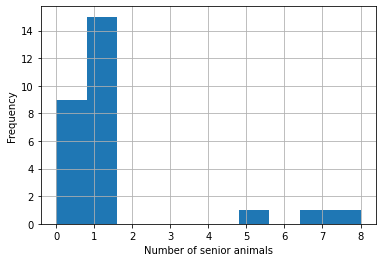

In [87]:
# Filter to senior animals only and calculate the length of time they have stayed here.
senior_stay = stay_sample.loc[stay_sample["age_group"] == "senior", :].copy()
senior_stay["time_stay"] = 2022 - senior_stay["year"]

print("Length of time senior animals still at the shelter have lived there:")
print(senior_stay["time_stay"].describe())

senior_stay["time_stay"].hist()
plt.ylabel("Frequency")
plt.xlabel("Number of senior animals")

In [89]:
senior_stay.sort_values("time_stay")

,animal id,name,datetime_intake,monthyear_intake,found location,intake type,intake condition,animal type,sex,age upon intake,...,date of birth,outcome type,outcome subtype,age upon outcome,age_number_outcome,age_group_outcome,_merge,current_age,age_group,time_stay
169516,A852967,Rex,2022-03-10 13:24:00,March 2022,Travis (TX),Owner Surrender,Normal,Dog,Intact Male,9 years,...,NaT,NaN,NaN,NaN,NaN,NaN,left_only,9.0,senior,0
169434,A852898,Green,2022-03-09 12:34:00,March 2022,7212 Meador Avenue in Austin (TX),Stray,Normal,Cat,Spayed Female,14 years,...,NaT,NaN,NaN,NaN,NaN,NaN,left_only,14.0,senior,0
169179,A852215,*Tucker,2022-02-28 10:36:00,February 2022,William Cannon in Austin (TX),Stray,Normal,Dog,Neutered Male,8 years,...,NaT,NaN,NaN,NaN,NaN,NaN,left_only,8.0,senior,0
169127,A851755,*Elvie,2022-02-18 10:25:00,February 2022,6303 Ogier Dr in Austin (TX),Stray,Normal,Dog,Intact Female,10 years,...,NaT,NaN,NaN,NaN,NaN,NaN,left_only,10.0,senior,0
168834,A851984,Iggy Pop,2022-02-22 14:29:00,February 2022,Austin (TX),Owner Surrender,Normal,Cat,Neutered Male,12 years,...,NaT,NaN,NaN,NaN,NaN,NaN,left_only,12.0,senior,0
168327,A851009,*Matt,2022-02-03 18:33:00,February 2022,2713 Francisco St in Austin (TX),Stray,Normal,Dog,Intact Male,9 years,...,NaT,NaN,NaN,NaN,NaN,NaN,left_only,9.0,senior,0
168233,A850436,Oso,2022-01-24 15:22:00,January 2022,Austin (TX),Owner Surrender,Normal,Dog,Neutered Male,10 years,...,NaT,NaN,NaN,NaN,NaN,NaN,left_only,10.0,senior,0
167768,A548940,Spot,2022-01-24 13:33:00,January 2022,5426 Menchaca Rd in Austin (TX),Public Assist,Sick,Dog,Neutered Male,13 years,...,NaT,NaN,NaN,NaN,NaN,NaN,left_only,13.0,senior,0
169457,A852129,*Kodi,2022-02-25 13:28:00,February 2022,8028 Elroy Road in Travis (TX),Stray,Normal,Dog,Intact Male,9 years,...,NaT,NaN,NaN,NaN,NaN,NaN,left_only,9.0,senior,0
167426,A848897,*Robby G,2021-12-29 20:06:00,December 2021,10811 San Jose Ave in Austin (TX),Stray,Injured,Dog,Neutered Male,7 years,...,NaT,NaN,NaN,NaN,NaN,NaN,left_only,8.0,senior,1


From the descriptive statistics, the majority of senior pets still staying at the shelter have been staying there for less than 2 years, and only a few (3 animals) have been there for at least 5 years. All of these 3 longest residents are cats, with two being stray.

## Conclusions

1. Senior animals make up only a small percentage of all animal intakes at the Austin Animal Shelter since October 2013.
2. The majority of the animals have exited the shelter with a good outcome. That is, as of the time of this report in March 2022, they have been either returned to owner (43%), adopted (28%), or transferred to a partner organization (19%). Only 7.7% of all senior animals have been euthanized since October 2013.
    * For adoptions, the result is in favor of my hypothesis that senior animals have statistically longer time in the shelter before being adopted than younger animals. This finding is consistent with the APCA's statement that senior animals are often the last to be adopted (https://www.aspca.org/blog/four-reasons-open-your-mind-older-pets).
4. The majority of senior animals that still stay at the shelter have been newly admitted. The longest residents (2 stray cats and 1 owner surrender cat) are still there.

Based on the findings, animal shelters may need to increase their marketing efforts for senior dogs and cats if they want to reduce the amount of time it takes for these animals to be adopted. A few options can be to reduce the adoption fees for senior animals, raise awareness of potential adopters about how senior animals might be a wonderful addition to their family, and highlight these animals more frequently on their social platforms. 

## Future works

* To dissect any potential differences in outcomes and intakes between senior cats and senior dogs, and among breeds.
* To run a regression analysis looking at factors that affect the length of stay in a shelter of animals before being adopted.
* To investigate whether senior adoptions happen more in November, the national senior pet adoption month.